In [1]:
import numpy as np 
import numpy.random as npr
import networkx as nx
import matplotlib as plt
import plotly.graph_objects as go
import pydtmc
import sys 
sys.path.append("./modules/")
from markov import *
import graphviz

In [2]:
# variables

alpha = 0.8
beta = 0.2
u1 = 15
u2 = 75
thinkTime = 5000
timeSlice = 3
Sio1 = 40
Sio2 = 180
qio1 = 0.65 #route to io1
qio2 = 0.25 # route to io2
qoutd = 0.1*0.4 #go to delay station
qouts = 0.1*0.6 # renter the system

legend (Delay_station,CPU.Stage,IO1,IO2)


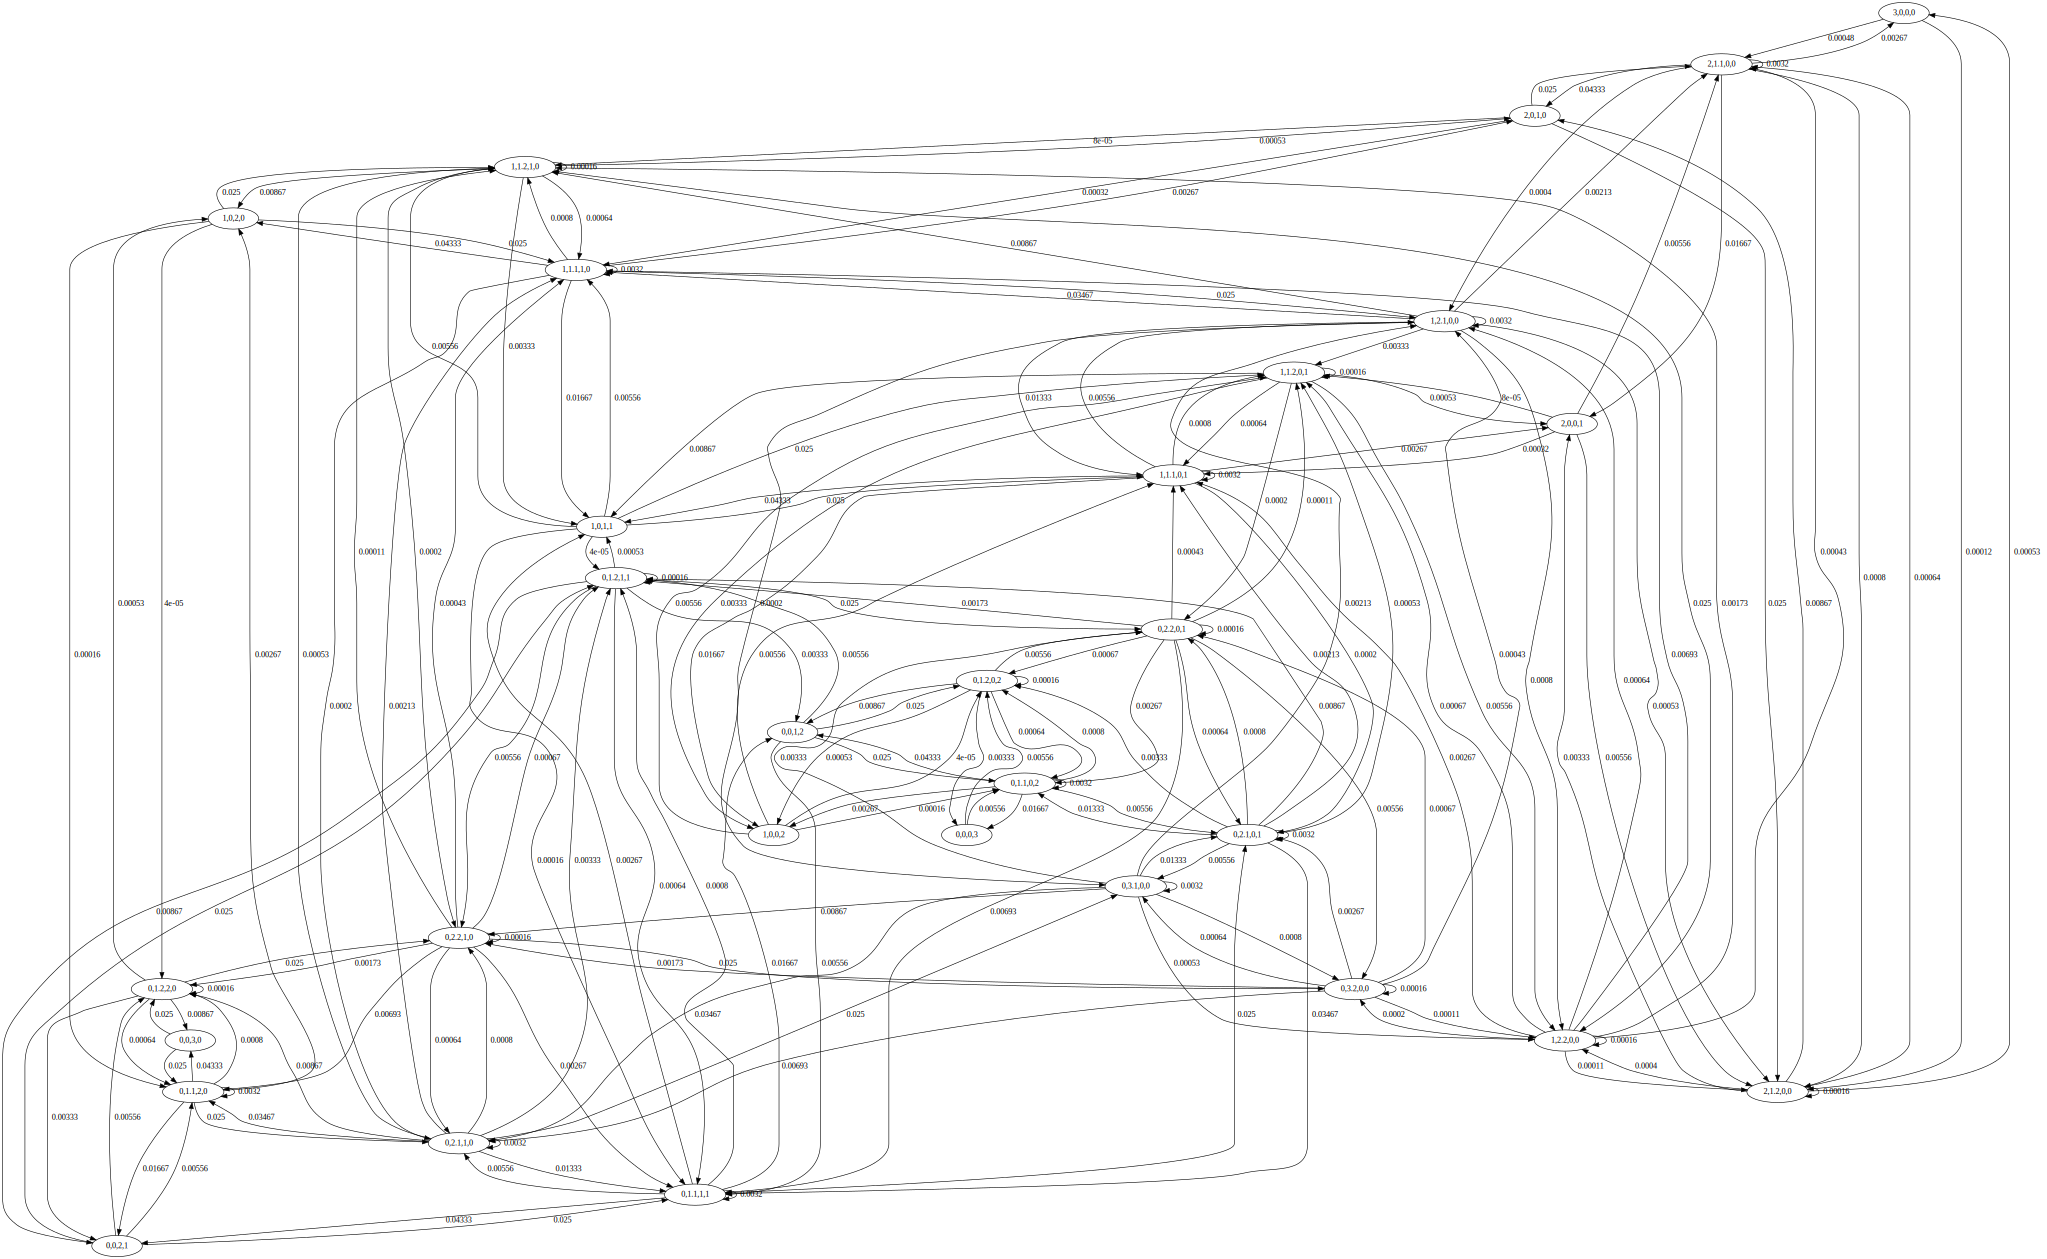

In [3]:
generator = ChainGenerator(node_enumerator())
generator(State(3,0,0,0))
chain = generator.chain()
Printer.nx_to_graphviz(chain)

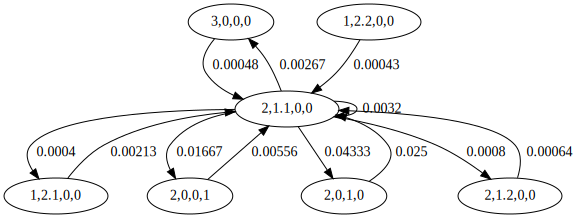

In [4]:
graph=  generator.subgraph(State(2,1,0,0,1))

Printer.nx_to_graphviz(graph)

In [5]:
def balance_ctmc(mat : np.ndarray[np.ndarray]) -> np.ndarray:
    copy = mat.copy()
    for i in range(len(mat)):
        copy[i][i] = -mat[i].sum()
        pass
    return copy
    pass

In [6]:
nodes = list(map(lambda x : str(x),generator.ordered))
mat = np.zeros((len(nodes),len(nodes)))
adj :dict = chain.graph.adj
for i in range(len(nodes)):
    ref = nodes[i]
    for j in range(len(nodes)):
        to = nodes[j]
        if to in adj[ref]:
            mat[j][i] = round(adj[ref][to]["weight"],5)
        pass
    pass
pass

q = balance_ctmc(mat)

print(q)


[[-3.73000e-03  2.67000e-03  5.30000e-04 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 4.80000e-04 -1.33020e-01  6.40000e-04 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 [ 1.20000e-04  8.00000e-04 -1.24940e-01 ...  0.00000e+00  0.00000e+00
   0.00000e+00]
 ...
 [ 0.00000e+00  0.00000e+00  0.00000e+00 ... -2.08867e+00  0.00000e+00
   0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 ...  0.00000e+00 -4.97200e+00
   0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00 ...  0.00000e+00  0.00000e+00
  -2.08867e+00]]


In [7]:
def convert_to_dtmc(mat: np.ndarray[np.ndarray]) -> np.ndarray:
    maxq = 0
    ctmc = mat.copy()
    for i in range(len(ctmc)):
        if abs(ctmc[i][i]) > abs(maxq):
            maxq = ctmc[i][i]
            pass
        pass
    id = np.identity(len(ctmc))
    for i in range(len(ctmc)):
        for j in range(len(ctmc[i])):
            ctmc[i][j] = id[i][j] - (ctmc[i][j]/maxq)
            pass
        if ctmc[i].sum() <1:
            for k in range(len(ctmc[i])):
                if ctmc[i][k] >0:
                    ctmc[i][k] += (1-ctmc[i].sum())
                    pass
                pass
            pass
        pass
    return ctmc

dtmc = pydtmc.MarkovChain(convert_to_dtmc(q))


bi:0.00017276275467947654, di:0.00023811495776032726, 0.9997586497846613
bi:4.1411297001822096e-05, di:5.1764121252277615e-05, 0.9913929207387775
bi:3.429373032963392e-05, di:0.0, 0.9919157383634255
bi:0.0, di:0.0, 0.9875293761388106
bi:0.0, di:0.0, 0.9972137961735962
bi:0.0, di:0.0, 0.9947977058141461
bi:0.0, di:0.0, 0.9997586497846612
bi:0.0, di:0.0, 0.9972137961735962
bi:0.0005609936640715587, di:0.0016176287891336756, 0.9947977058141461
bi:7.764618187841643e-06, di:3.429373032963392e-05, 0.9919157383634255
bi:0.0, di:0.0, 0.9997586497846612
bi:0.0, di:0.0, 0.9972137961735962
bi:0.0, di:0.0, 0.9947977058141461
bi:0.0, di:0.0, 0.9997586497846612
bi:0.0, di:0.0, 0.9859609232648666
bi:0.0, di:0.0, 0.9972137961735962
bi:0.0, di:0.0, 0.9947977058141461
bi:0.0, di:0.0, 0.9997586497846612
bi:0.0, di:0.0, 0.9837952418419745
bi:0.0, di:0.0, 0.9093707294599966
bi:0.0, di:0.0, 0.9373518252029154
bi:0.0, di:0.0, 0.9126318690988902
bi:0.00011193991220805035, di:0.0016176287891336756, 0.942269416

IndexError: index 1785 is out of bounds for axis 0 with size 1785

In [9]:

(chain
("3,0,0,0","2,1.1,0,0",(1/thinkTime)*alpha*3, (1/u1)*qoutd)
(chain.last_tail,"1,2.1,0,0",(1/thinkTime)*2,(1/u1)*qoutd*alpha)
(chain.last_tail,"0,3.1,0,0",(1/thinkTime),(1/u1)*qoutd*alpha)
("3,0,0,0","2,1.2,0,0",(1/thinkTime)*beta*3,(1/u2)*qoutd)
(chain.last_tail,"1,2.2,0,0",(1/thinkTime)*2,(1/u2)*beta*qoutd)
(chain.last_tail,"0,3.2,0,0",(1/thinkTime),(1/u2)*beta*qoutd)
("0,3.1,0,0","0,2.1,1,0", (1/u1)*alpha*qio1,(1/u1)*alpha*qouts) 
(chain.last_tail, "0,1.1,2,0", (1/u1)*alpha*qio1,(1/Sio1))
(chain.last_tail, "0,0,3,0",(1/u1)*alpha*qio1,(1/Sio1))
("0,0,3,0","0,1.2,2,0",(1/Sio1)*beta,(1/u2)*qio1)
(chain.last_tail,"0,2.2,1,0",(1/Sio1),(1/u2)*qio2)
(chain.last_tail, "0,3.2,0,0",(1/Sio1),(1/u2)*qio1*beta)
("0,3.2,0,0","0,2.1,1,0",(1/u2)*alpha*qio1)
(chain.last_tail,"0,1.2,2,0",(1/u1)*beta*qio1)
("0,3.1,0,0","0,2.1,0,1",(1/u1)*alpha*qio2)
(chain.last_tail,"0,1.1,0,2",(1/u1)*alpha*qio2)
(chain.last_tail,"0,0,0,3",(1/u1)*alpha*qio2)
("0,3.2,0,0","0,2.2,0,1",(1/u2)*beta*qio2)
(chain.last_tail,"0,1.2,0,2",(1/u2)*beta*qio2)
(chain.last_tail,"0,0,0,3",(1/u2)*beta*qio2)
("0,3.2,0,0","0,2.1,0,1",(1/u2)*alpha*qio2)
(chain.last_tail,"0,1.2,0,2",(1/u2)*beta*qio2)
("0,3.1,0,0","0,2.2,0,1",(1/u1)*beta*qio2)
(chain.last_tail,"0,1.1,0,2",(1/u2)*alpha*qio2)
("0,1.1,0,2","0,0,1,2",(1/u1)*qio1)
("0,1.2,0,2","0,0,1,2",(1/u2)*qio1)
("0,1.1,2,0","0,0,2,1",(1/u1)*qio2)
("0,1.2,2,0","0,0,2,1",(1/u2)*qio2)
("0,2.2,1,0","0,1.2,1,1",(1/u2)*beta*qio2)
("0,2.2,1,0","0,1.1,1,1", (1/u2)*alpha*qio2)
("0,1.1,1,1","0,0,2,1",(1/u1)*qio1)
("0,1.2,1,1","0,0,2,1",(1/u2)*qio1)
("0,1.1,0,2","1,0,0,2",(1/u1)*qoutd)
("1,2.1,0,0","2,1.1,0,0",(1/u1)*alpha*qoutd)
("0,3.1,0,0","1,2.1,0,0",(1/u1)*alpha*qoutd)
("0,1.2,2,0","0,0,3,0",(1/u2)*qio1)
("0,0,2,1","0,1.1,2,0",(1/Sio2)*alpha*qouts)
("0,0,2,1","0,1.2,2,0",(1/Sio2)*qouts*alpha)
)